<a href="https://colab.research.google.com/github/Sergiocepedar/Dise-o_experimentos/blob/main/Taller_dise%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import shapiro
import mpl_toolkits
import numpy as np
import matplotlib.pyplot as plt
import folium
import pandas as pd
import numpy as np
from random import sample
import seaborn as sns
import random as rd
import scipy as sc 
import folium
from matplotlib.lines import Line2D
from folium.map import Popup
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits import mplot3d
import plotly.express as px
from scipy.spatial import distance_matrix



**Integrantes:**

*   Yuly Natalia Melgarejo Cuevas 
*   Sergio Nicolas Cepeda Rodriguez 




## **Asignación: Diseño de Experimentos/ Práctica Python**

El siguiente conjunto de datos agronómicos permite usar la misma entrada para ajustar diferentes modelos haciendo uso esta vez del programa Python usando cualquier plataforma. 

La matriz de datos contiene las variables

y: Latitud

x: Longitud

SMI: Índice de humedad del suelo

NDVI: Indice de vegetación de diferencia normalizado

LST: Temperatura en la superficie del suelo


**1. Convertir el código R en Python para generar un data.frame de manera análoga**


In [ ]:
import random
random.seed(1006944258)
seqlat = np.arange(-73.30, -73.25, 0.001)
seqlong = np.arange(5.54, 5.58, 0.001)
latitude = np.random.choice(seqlat, size=100, replace=True)
longitude = np.random.choice(seqlong, size=100, replace=True)


In [ ]:
data = {
  "x": longitude,
  "y": latitude
}
xy = pd.DataFrame(data)
print(xy)

        x       y
0   5.550 -73.255
1   5.570 -73.300
2   5.572 -73.271
3   5.573 -73.264
4   5.580 -73.262
..    ...     ...
95  5.575 -73.274
96  5.540 -73.265
97  5.569 -73.289
98  5.561 -73.275
99  5.568 -73.272

[100 rows x 2 columns]


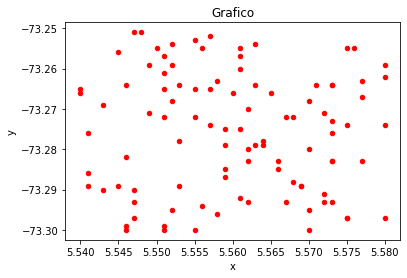

In [ ]:
xy.plot(kind = 'scatter',
        x = 'x',
        y = 'y',
        color = 'red')

plt.title('Grafico')
  
plt.show()

In [ ]:
SMI = np.partition(np.random.uniform(0.7,0.95,100), 10)
NDVI = np.partition(np.random.uniform(0.45,0.06,100), 10)
LST = np.partition(26* sc.stats.beta.rvs(0.87,0.91, size=100), 10)



**2. Graficar la nube de puntos (solo coordenadas)**

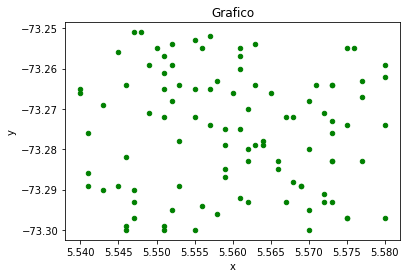

In [ ]:
xy.plot(kind = 'scatter',
        x = 'x',
        y = 'y',
        color = 'green')

plt.title('Grafico')
  
plt.show()

**3. Asignar al gráfico un tamaño al punto de acuerdo con el SMI (graficar)**

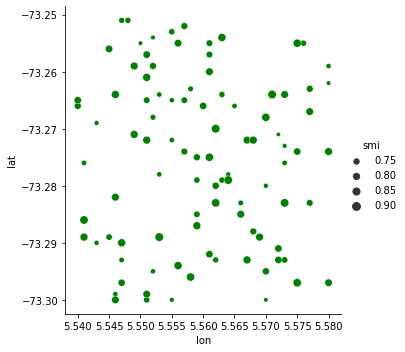

In [ ]:
df = pd.DataFrame({'lat' : latitude, 'lon': longitude, 'smi': SMI, 'lst':LST,'ndvi':NDVI })
sns.relplot(x="lon", y="lat", size="smi", color='green', data=df)




*   El índice de humedad del suelo no parece ser alto o bajo en un área en particular, por el contrario es muy variable.





**4. Asignar al gráfico un color al punto de acuerdo con el NDVI (graficar)**

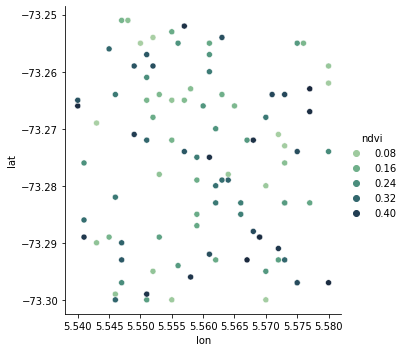

In [ ]:
sns.relplot(x="lon", y="lat", hue="ndvi", palette="ch:r=-.5,l=.75", data=df)



*   El índice de vegetación de diferencia normalizado no parece ser alto o bajo en un área en particular.



**5. Asignar al gráfico una forma al punto de acuerdo con el LST(graficar)**

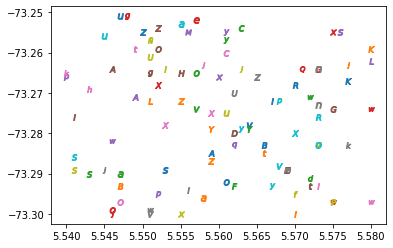

In [ ]:
chars = "QWERTYUIOPASDFGHJKLÑZXCVBNMqwertyuiopasdfghjklñzxcvbnm"
form = []

for j in range(100):
  form.append('$'+random.choice(chars)+'$')

for i in range (len(df['lon'])):
  plt.scatter(df['lon'][i], df['lat'][i], marker=form[i])
plt.show()


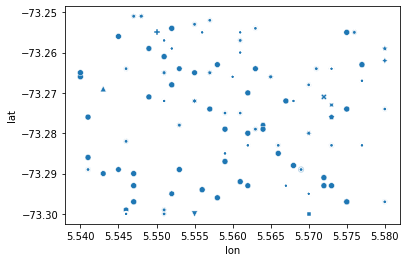

In [ ]:
sns.scatterplot(data=df, x="lon", y="lat",  style="lst", legend = False)

**6. Buscar alguna librería o programa (en última opción) que permita visualizar los puntos en el mapa de Colombia (¿están todos los puntos en Colombia? ¿pertenecen los puntos a alguna región específica de Colombia? ¿están todos los puntos dentro de esa región? Si alguno se sale de esa región (departamento), decartarlo y volver a graficar.**

In [ ]:
Map = folium.Map(location= [4.570868, -74.297333],zoom_start=6)
for i in range(len(df['lat'])):
  folium.Marker(
      location= [df['lon'][i],df['lat'][i]],
      popup=f"lon:{df['lon'][i]}, lat:{df['lat'][i]}" ,
      icon= folium.Icon()
      ).add_to(Map) 
Map





*   Todos los puntos están dentro de Colombia, en los alrededores de Chivata obre el altiplano Cundiboyacense. 




**7. Realice un boxplot para SMI**

In [ ]:
df2 = pd.DataFrame({ 'ndvi':NDVI,'smi': SMI, 'lts':LST })

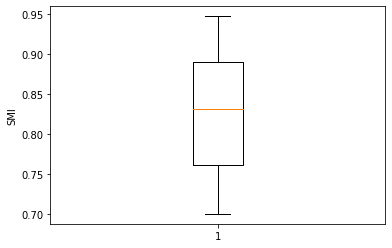

In [ ]:
plt.boxplot(SMI)
plt.ylabel('SMI',fontsize=10)
plt.show()

*   No se muestran datos atípicos 



**8. Realice un histograma para NDVI**

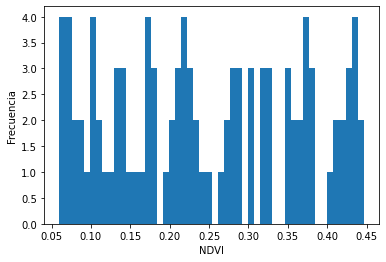

In [ ]:
plt.hist(NDVI, bins=50)
plt.xlabel('NDVI',fontsize=10)
plt.ylabel('Frecuencia',fontsize=10)
plt.show()



*   La forma del histograma se asemeja a la de una distribución asimétrica negativa, sin embargo en muchas partes de esta se conserva cierta uniformidad.



**9. Grafique la densidad para LST**

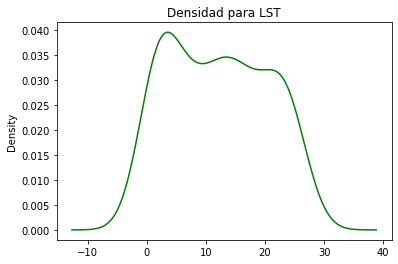

In [ ]:
df.lst.plot.density(color='green')
plt.title('Densidad para LST')
plt.show()

**10. Calcule estadísticas descriptivas para las 3 variables**

In [ ]:
df2.describe()

,ndvi,smi,lts
count,100.000000,100.000000,100.000000
mean,0.245326,0.828953,12.107693
std,0.118769,0.072434,8.183838
min,0.060021,0.700492,0.221226
25%,0.142736,0.760914,3.828053
50%,0.229921,0.831166,12.014879
75%,0.351847,0.890562,18.884901
max,0.446365,0.947101,25.962235




*   En este caso no se pueden comparar las medias debido a que son variables diferentes. A diferencia de los índices, la temperatura en la superficie del suelo toma valores mas grandes por la naturaleza misma de la medida.



**11. Fracciones los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante**

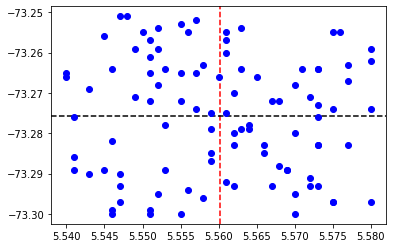

In [ ]:
lonmedia = np.mean(xy['x'])
latmedia = np.mean(xy['y'])
plt.axvline(x=lonmedia, color="red", linestyle="--")
plt.axhline(y=latmedia, color="black", linestyle="--")
plt.plot(xy['x'], xy['y'], 'bo')
plt.show()


In [ ]:
print(lonmedia)
print(latmedia)

5.560150000000005
-73.27576999999987


In [ ]:

conditions = [
    (xy['x'] > lonmedia) & (xy['y'] > latmedia),
    (xy['x'] < lonmedia) & (xy['y'] > latmedia),
    (xy['x'] < lonmedia) & (xy['y'] < latmedia),
    (xy['x'] > lonmedia) & (xy['y'] < latmedia)
    ]

fac = ['I', 'II', 'III', 'IV']

xy['factor'] = np.select(conditions, fac)

xy['smi']= SMI
xy['ndvi']= NDVI
xy['lst']= LST

print(xy)

        x       y factor       smi      ndvi        lst
0   5.550 -73.255     II  0.709622  0.061676   0.705009
1   5.570 -73.300     IV  0.708976  0.068794   0.544151
2   5.572 -73.271      I  0.700492  0.063217   0.457627
3   5.573 -73.264      I  0.711240  0.068789   0.742611
4   5.580 -73.262      I  0.709127  0.072364   1.060573
..    ...     ...    ...       ...       ...        ...
95  5.575 -73.274      I  0.853776  0.369825  21.614791
96  5.540 -73.265     II  0.860026  0.361441  24.510976
97  5.569 -73.289     IV  0.890182  0.438304  12.914584
98  5.561 -73.275      I  0.921478  0.423826  17.017429
99  5.568 -73.272      I  0.893828  0.424261  22.252887

[100 rows x 6 columns]


In [ ]:
xy.groupby('factor').describe()

x                      ...        lst                      
       count      mean       std  ...        50%        75%        max
factor                            ...                                 
I       24.0  5.570167  0.006722  ...  12.972839  18.370543  25.879465
II      28.0  5.551393  0.005370  ...   8.270157  21.036887  25.962235
III     22.0  5.549818  0.006107  ...  11.481807  17.178466  24.774873
IV      26.0  5.569077  0.005145  ...  14.103757  18.572559  25.354074

[4 rows x 40 columns]



*   Hay mas puntos muestreados en el cuadrante IV.
*   En el cuadrante II los datos de indice de humedad en le suelo tienden a estar mas cerca de su media. 








**12. Realice un boxplot para SMI que muestre las cajas de los 4 cuadrantes en el mismo gráfico**

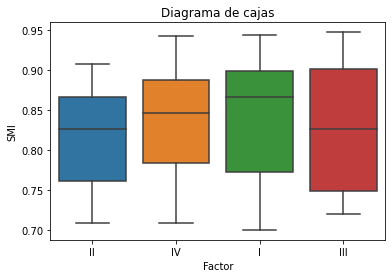

In [ ]:
sns.boxplot(data=xy, x='factor', y='smi')
plt.ylabel('SMI')
plt.xlabel('Factor')
plt.title('Diagrama de cajas')
plt.show()

**13. Realice un histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)**

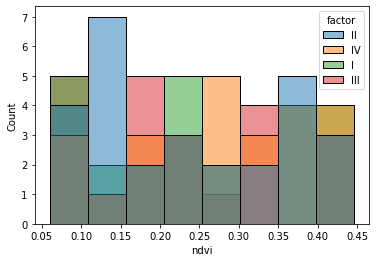

In [ ]:
xy.groupby('factor')
sns.histplot(data=xy,x="ndvi", hue="factor")

**14. Realice un gráfico de densidades múltiple para LST que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo las densidades)**

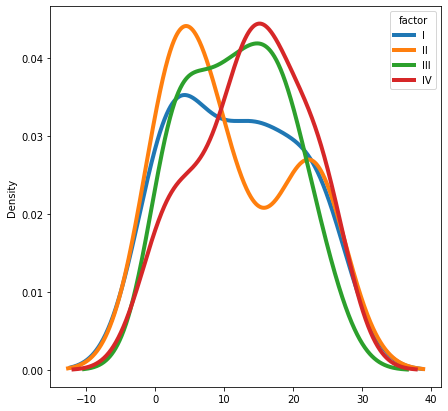

In [ ]:
df5=xy.pivot(columns='factor', values='lst') 

df5.plot.density(figsize = (7, 7), 
                       linewidth = 4) 

**15. Construya una matriz de correlaciones de Pearson para las 5 variables**

In [ ]:
df6=pd.DataFrame({'lat' : latitude, 'lon': longitude,  'lst':LST ,'smi': SMI,'ndvi':NDVI })
df6.corr()
corr= df6.corr ()
corr.style.background_gradient (cmap = 'coolwarm')


,lat,lon,lst,smi,ndvi
lat,1.000000,-0.039125,-0.133879,-0.120200,-0.143807
lon,-0.039125,1.000000,0.071670,0.038652,0.033441
lst,-0.133879,0.071670,1.000000,0.565366,0.602631
smi,-0.120200,0.038652,0.565366,1.000000,0.702647
ndvi,-0.143807,0.033441,0.602631,0.702647,1.000000


Correlación positiva: Las variables se mueven en la misma dirección

correlación negativa: Las variables se mueven en la dirección opuesta



**16. Realice un grafico  de correlaciones para las 5 variables** 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e84b82810>,
      dtype=object)

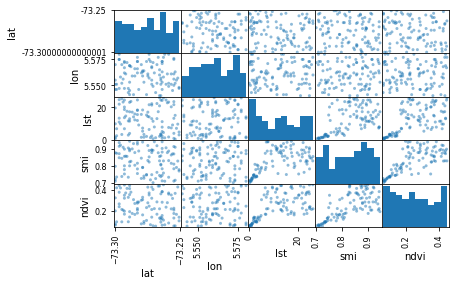

In [ ]:
pd.plotting.scatter_matrix(df6)

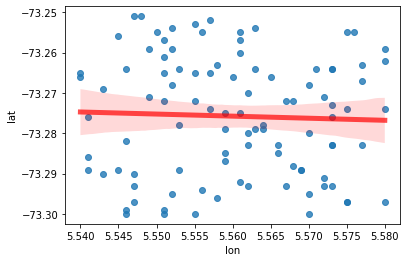

In [ ]:
sns.regplot(x=df6["lon"], y=df6["lat"], line_kws={"color":"r","alpha":0.7,"lw":5})

**17. Fraccione el gráfico de correlaciones por cuadrante y muestre las 4 figuras en un solo gráfico**


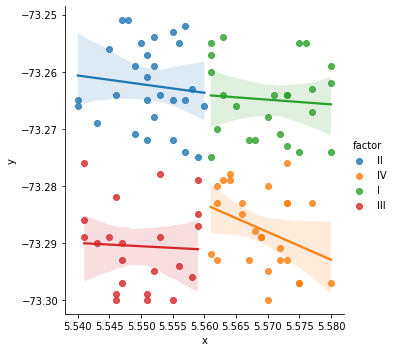

In [ ]:
sns.lmplot(x="x", y="y", hue="factor", data=xy)

**18. Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST**

In [ ]:
y = xy['ndvi'] # variable dependiente
x = xy['lst'] # variable independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary)  

                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     55.89
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           3.28e-11
Time:                        22:04:44   Log-Likelihood:                 94.228
No. Observations:                 100   AIC:                            -184.5
Df Residuals:                      98   BIC:                            -179.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1394      0.017      8.168      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


El R-squared nos indica un bajo ajuste del modelo a la variable ndvi   



**19. Ajuste un modelo de regresión multiple entre NDVI (respuesta) con  LST y SMI**

In [ ]:
y = xy['ndvi'] # variable dependiente
x = xy[{'lst',"smi"}] # variable independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     60.66
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           8.16e-18
Time:                        22:04:44   Log-Likelihood:                 112.23
No. Observations:                 100   AIC:                            -218.5
Df Residuals:                      97   BIC:                            -210.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5308      0.104     -5.086      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


El R-squared nos indica un mejor ajuste del modelo. 

**20. Tome una muestra del 80% del data.frame y calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos.**

In [ ]:
muestra_xy = df.sample(80)
print(muestra_xy )

       lat    lon       smi        lst      ndvi
20 -73.251  5.547  0.769786   4.639350  0.143202
36 -73.293  5.573  0.800906  18.643072  0.320408
11 -73.259  5.580  0.732690   1.577028  0.089280
86 -73.297  5.580  0.873048  13.264908  0.438216
63 -73.274  5.580  0.891705  14.046247  0.246371
..     ...    ...       ...        ...       ...
5  -73.254  5.552  0.714920   0.221226  0.062570
22 -73.265  5.557  0.805447   3.413160  0.124294
93 -73.264  5.571  0.944073   7.704608  0.382192
59 -73.286  5.541  0.932960  14.057669  0.307171
48 -73.257  5.551  0.865186  20.307553  0.350867

[80 rows x 5 columns]


In [ ]:
muestra_xy.corr()
mc= muestra_xy.corr ()
mc.style.background_gradient (cmap = 'coolwarm')

,lat,lon,smi,lst,ndvi
lat,1.000000,-0.062372,-0.178281,-0.161083,-0.178689
lon,-0.062372,1.000000,0.072790,0.055694,0.016681
smi,-0.178281,0.072790,1.000000,0.541109,0.684644
lst,-0.161083,0.055694,0.541109,1.000000,0.584567
ndvi,-0.178689,0.016681,0.684644,0.584567,1.000000


Correlación positiva: Las variables se mueven en la misma dirección

correlación negativa: Las variables se mueven en la dirección opuesta

**21. Haga un gráfico 3D para las 3 variables ambientales**

In [ ]:
f = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst')
  
f.show()

**22. Haga un gráfico 3D para las 3 variables ambientales y asigne color según cuadrante**

In [ ]:

fig = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst',
                    color = 'factor')
  
fig.show()

**23. Investigue como se construye una matriz de distancias entre todos las coordenadas**

In [ ]:



m = np.stack([xy['x'],xy['y']], axis=1)
mm=distance_matrix(m, m)
print(mm)


[[0.         0.04924429 0.02720294 ... 0.03894868 0.02282542 0.02475884]
 [0.04924429 0.         0.02906888 ... 0.01104536 0.02657066 0.02807134]
 [0.02720294 0.02906888 0.         ... 0.01824829 0.0117047  0.00412311]
 ...
 [0.03894868 0.01104536 0.01824829 ... 0.         0.01612452 0.01702939]
 [0.02282542 0.02657066 0.0117047  ... 0.01612452 0.         0.00761577]
 [0.02475884 0.02807134 0.00412311 ... 0.01702939 0.00761577 0.        ]]


In [ ]:
np.amax(mm)

0.05661271941905754

In [ ]:
0.05661271941905754/3

0.01887090647301918

In [ ]:
0.01887090647301918+0.01887090647301918



0.03774181294603836

**24. Ubique el centroide de toda la nube de puntos de coordenadas y seleccione solo puntos en una ventana de radio a lo sumo igual a 2/3 de la máxima distancia en la matriz de distancias**

(5.560150000000006, -73.27576999999987)


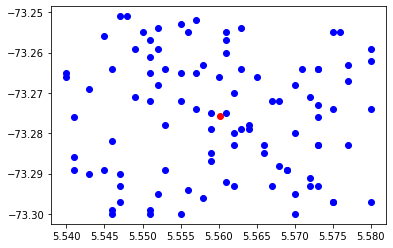

In [ ]:
data= np.array(m)
def centroid(array):
  length=array.shape[0]
  sum_x =np.sum(array[:,0])
  sum_y =np.sum(array[:,1])
  return sum_x /length ,sum_y/length

centroide = centroid(data)
print(centroide)
plt.plot(xy['x'],xy['y'],'bo')
plt.scatter(centroide[0],centroide[1],c="r")



**25. Calcule estadísticas descriptivas en esta ventana circular (dibuje la ventana) y asigne un color diferente a los puntos dentro de esta ventana**

(5.560150000000006, -73.27576999999987)


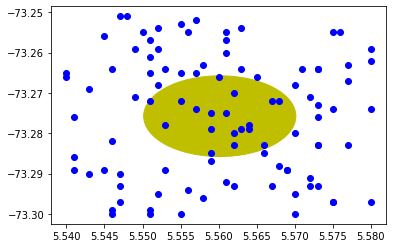

In [ ]:
centroide = centroid(data)
print(centroide)
circle = plt.Circle((centroide), 0.01, color='y')
fig, ax = plt.subplots()
ax.add_patch(circle)

plt.plot(xy['x'],xy['y'],'bo')
plt.scatter(centroide[0],centroide[1],c="r")

In [ ]:
des=xy.describe()
print(des)



                x           y         smi        ndvi         lst
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean     5.560150  -73.275770    0.828953    0.245326   12.107693
std      0.011119    0.014639    0.072434    0.118769    8.183838
min      5.540000  -73.300000    0.700492    0.060021    0.221226
25%      5.551000  -73.289000    0.760914    0.142736    3.828053
50%      5.560500  -73.274500    0.831166    0.229921   12.014879
75%      5.570000  -73.264000    0.890562    0.351847   18.884901
max      5.580000  -73.251000    0.947101    0.446365   25.962235


**26.  Suponga que queremos hacer un análisis de varianza para comparar la media de SMI por cuadrante. Se pide primero tomar aleatoriamente 10 datos de cada cuadrante y construir un nuevo data.frame con todas las variables pero solo con 40 filas. Utilice el análisis de varianza (modulo pingouin si desea) para comparar el índice medio de los 4 cuadrantes.**


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod= ols("smi ~ factor" ,data=dx3).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)


            sum_sq    df         F    PR(>F)
factor    0.008797   3.0  0.534606  0.661527
Residual  0.197459  36.0       NaN       NaN


**27. Use alguna librería que permita extraer los residuales del modelo y haga su histograma**

In [ ]:
resu=mod.resid
print(resu)

0    -0.116575
1    -0.012115
2    -0.118688
3     0.025961
4     0.116100
5    -0.110626
6     0.051536
7    -0.017005
8     0.087750
9     0.093662
10   -0.050456
11   -0.097466
12    0.076210
13    0.091752
14    0.080554
15    0.043613
16   -0.021389
17   -0.064412
18    0.018074
19   -0.076481
20   -0.066655
21   -0.052625
22   -0.054035
23    0.101959
24    0.017436
25    0.003441
26   -0.034793
27    0.011023
28    0.112233
29   -0.037983
30    0.042785
31   -0.094466
32   -0.021183
33    0.053388
34   -0.012028
35    0.138878
36   -0.076695
37    0.020544
38   -0.002536
39   -0.048687
dtype: float64


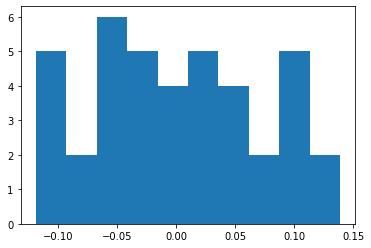

In [ ]:
 pyplot.hist(resu)
 pyplot.show()

**28. Utilice la prueba de Shapiro para probar normalidad en los residuales**

In [ ]:
# normality test
stat, p = shapiro(resu)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.969, p=0.329
Sample looks Gaussian (fail to reject H0)


No rechazamos la hipótesis nula, suponemos que los residuos se distribuyen normalmente 

**29. Utilice la prueba de Levine para probar igualdad de varianzas de los residuales**

In [ ]:
!pip install bioinfokit

from bioinfokit.analys import stat 

In [ ]:
res = stat()
res.anova_stat(df=dx3, res_var='smi', anova_model='smi ~ C(factor)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
C(factor),3.0,0.008797,0.002932,0.534606,0.661527
Residual,36.0,0.197459,0.005485,NaN,NaN


In [ ]:
res = stat()
res.levene(df=dx3, res_var='smi', xfac_var='factor')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.9179
1,Degrees of freedom (Df),3.0000
2,p value,0.4420


No se rechaza la hipotesis nula, suponemos varianzas iguales 

**30. Investigue como se calcula el índice de Moran y pruebe si los residuales muestran dependencia atribuible a la autocorrelación espacial entre ellos.**

In [ ]:
dx6=pd.merge(dx5,resu,how='outer' )

gdf = gpd.read_file()
y = gdf['Donatns'].values
w = Queen.from_dataframe(gdf)
w.transform = 'r'
from esda.moran import Moran
w = Queen.from_dataframe(gdf)
moran = Moran(y, w)
moran.I